In [1]:
# PYMACEUTICALS, INC.

## Analysis

#### This project involved analyzing test results from 249 mice, divided into 10 different drug treatments, including a placebo/control regimen. The analysis focused on specific parameters to identify trends and patterns, aiming to inform decisions about anti-cancer medications. Specifically, the study examined the relationship between mouse weight and tumor size. The results demonstrated a strong correlation: as mouse weight increased, tumor size tended to be larger. Four drugs were analyzed in the study: Capomulin, Ramicane, Infubinol, and Ceftamin. The findings indicated that Capomulin and Ramicane were the most effective, while Infubinol and Ceftamin were the least effective.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df[df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = df[df["Mouse ID"].isin(duplicate_mouse_ids)]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#df_cleaned = df.drop_duplicates(["Mouse ID", "Timepoint"], keep='first')
df_cleaned = df.loc[df["Mouse ID"] != "g989"]
df_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = df_cleaned["Mouse ID"]
unique_mice_count.nunique()

248

# Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_df = df.groupby("Drug Regimen")

# Stats
summary_stats = grouped_df["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats.columns = [
    "Mean Tumor Volume", 
    "Median Tumor Volume", 
    "Tumor Volume Variance", 
    "Tumor Volume Std. Dev.", 
    "Tumor Volume Std. Err."
]
summary_df = pd.DataFrame(summary_stats)
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = df_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Std_Dev="std",
    SEM="sem"
)

summary_df


,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

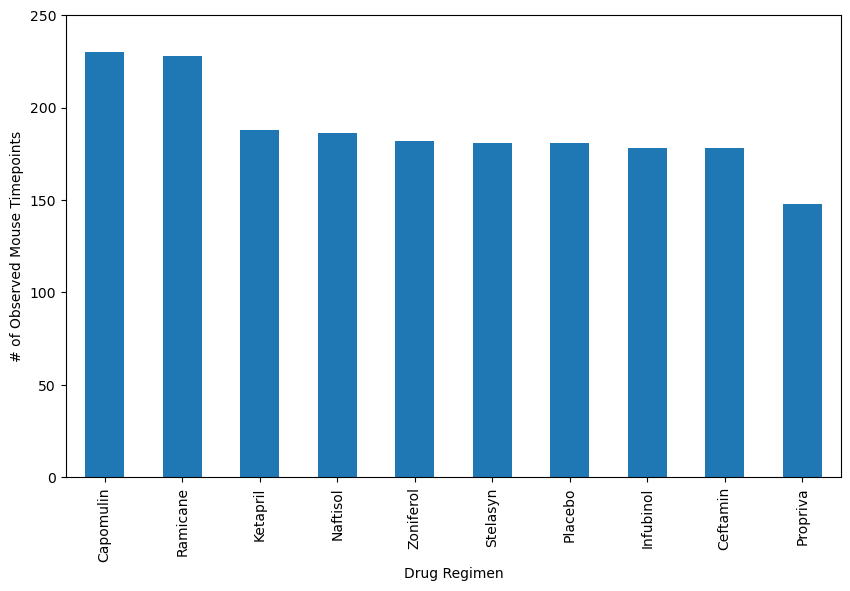

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_count = df_cleaned["Drug Regimen"].value_counts()
mouse_count.plot(kind="bar", figsize=(10,6))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.ylim(0,250)
plt.xticks(rotation=90)
plt.show()

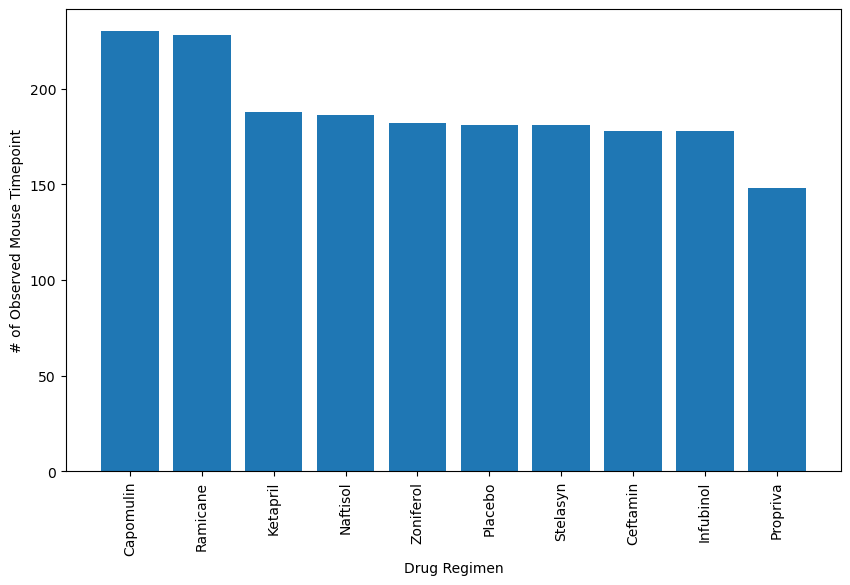

In [11]:
mouse_count_pyplot = df_cleaned.groupby("Drug Regimen")["Mouse ID"].size()
mouse_count_pyplot_sorted = mouse_count_pyplot.sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(mouse_count_pyplot_sorted.index, mouse_count_pyplot_sorted.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoint')
plt.xticks(rotation=90)
plt.show()

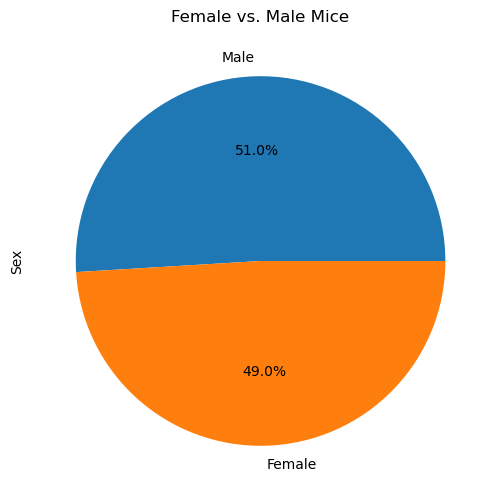

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_count = df_cleaned["Sex"].value_counts()
mouse_count.plot.pie(figsize=(8, 6), autopct="%1.1f%%", labels=mouse_count.index, ylabel="Sex", title="Female vs. Male Mice")

plt.show()

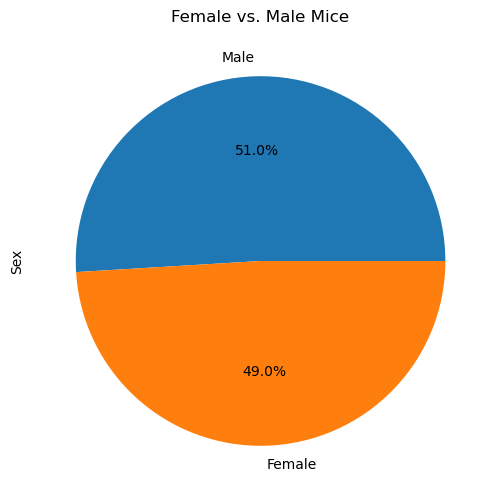

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_count = df_cleaned['Sex'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(mouse_count, labels=mouse_count.index, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Female vs. Male Mice")

plt.show()

# Quartiles, Outliers, and Boxplots

In [14]:
# Get the last (Greatest) timepoint for each mouse and merge
mouse_timepoint = df_cleaned.groupby("Mouse ID")["Timepoint"].max().reset_index()
merged_df = mouse_timepoint.merge(df_cleaned, on=["Mouse ID", "Timepoint"], how="left")

# creating a list
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volumes = {treatment: [] for treatment in treatments}

# for Loop
for treatment in treatments:
    treatment_data = merged_df[merged_df["Drug Regimen"] == treatment]
    tumor_volumes[treatment] = treatment_data["Tumor Volume (mm3)"].tolist()


# For loop to identify outliers
outliers = {}
for treatment, volumes in tumor_volumes.items():
    quartiles = pd.Series(volumes).quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers[treatment] = [v for v in volumes if v < lower_bound or v > upper_bound]

for treatment, outlier_data in outliers.items():
    print(f"{treatment}'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


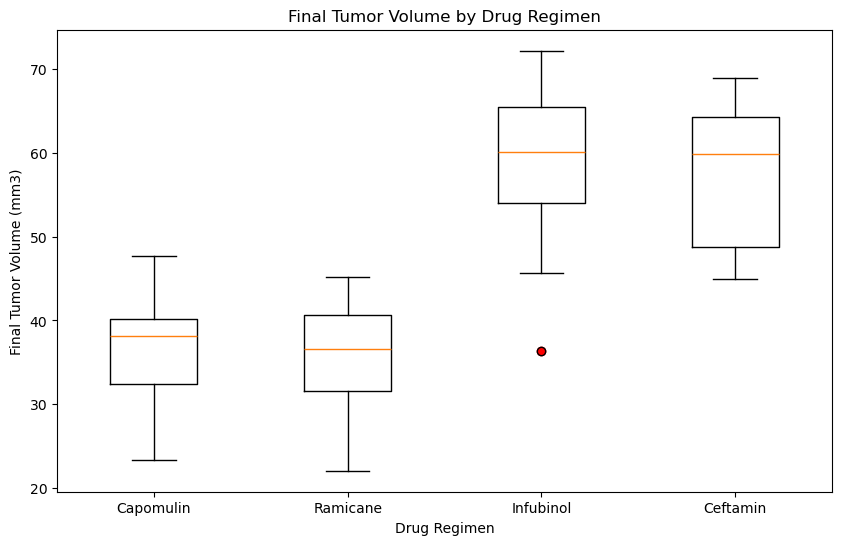

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(tumor_volumes.values(), labels=treatments, flierprops=dict(markerfacecolor='r', marker='o'))

# Add title and labels
plt.title('Final Tumor Volume by Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')


# Highlight outliers
for treatment, outlier_data in outliers.items():
    for outlier in outlier_data:
        # Find the position of the treatment in the box plot
        position = treatments.index(treatment) + 1
        plt.scatter([position] * len(outlier_data), outlier_data, color='red')

plt.show()

# Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

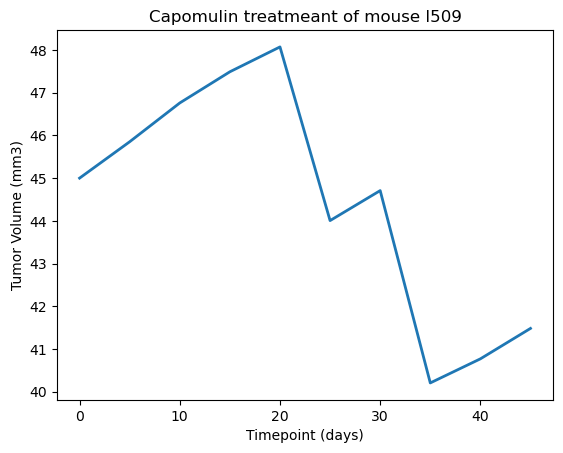

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_capomulin = df_cleaned.loc[df_cleaned["Drug Regimen"] == "Capomulin",:]

line_df = mouse_capomulin.loc[mouse_capomulin["Mouse ID"] == "l509",:]
line_df.head()
x_axis = line_df["Timepoint"]
tumsiz = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')


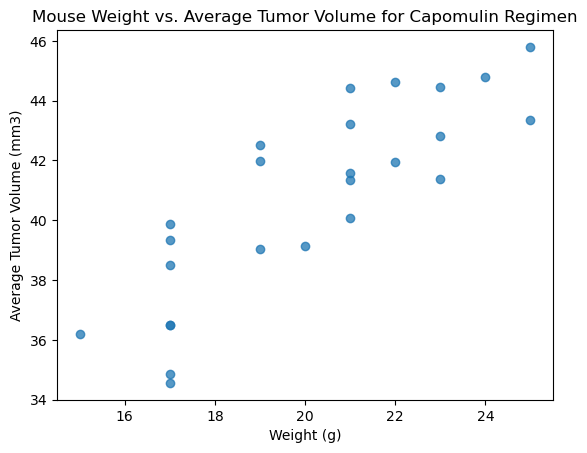

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

mouse_capomulin.loc[:,'Weight (g)'] = pd.to_numeric(mouse_capomulin['Weight (g)'], errors='coerce')
mouse_capomulin.loc[:,'Tumor Volume (mm3)'] = pd.to_numeric(mouse_capomulin['Tumor Volume (mm3)'], errors='coerce')

# Calculate the average tumor volume and weight for each mouse
capoavg = mouse_capomulin.groupby('Mouse ID').agg({
    'Weight (g)': 'mean',
    'Tumor Volume (mm3)': 'mean'
}).reset_index()

# Generate the scatter plot
plt.scatter(capoavg['Weight (g)'], capoavg['Tumor Volume (mm3)'], alpha=0.75)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Save the figure
plt.savefig('scatterplot.png')
plt.show()

# Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


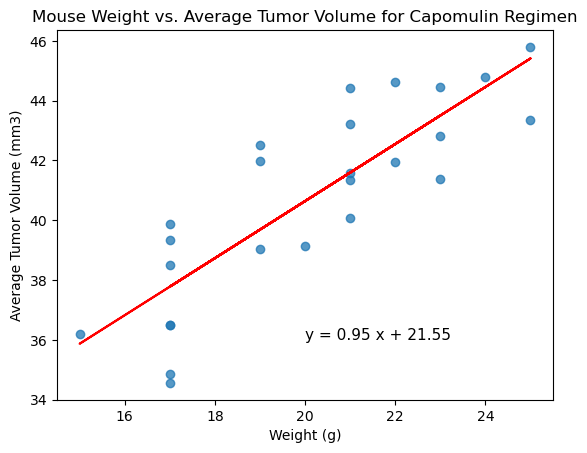

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = capoavg['Weight (g)'].corr(capoavg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation, 2)}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(capoavg['Weight (g)'], capoavg['Tumor Volume (mm3)'])
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"


# Generate the scatter plot with the regression line
plt.scatter(capoavg['Weight (g)'], capoavg['Tumor Volume (mm3)'], alpha=0.75)
plt.plot(capoavg['Weight (g)'], slope * capoavg['Weight (g)'] + intercept, color='r')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(line_eq,(20,36), fontsize=11)


# Save the figure
plt.savefig('scatterplot_with_regression.png')

# Show the plot
plt.show()